# CUSTOMER CHURN PREDICTION

#### Task
Develop a model to predict customer churn for a subscriptionbased service or business. Use historical customer data, including
features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient
Boosting to predict churn.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
data.shape

(10000, 14)

In [41]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Drop  unnecessary columns

In [42]:
data.drop(['RowNumber','CustomerId','Surname'],axis='columns', inplace= True )

In [43]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Check if we have any NaN values

In [44]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [45]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [46]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Converting the categorical columns into numerical

In [49]:
data = pd.get_dummies(data,columns=['Geography','Gender'])
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [51]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


### Scaling Columns

In [52]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [54]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1,1,0


### Now let's check if we have imbalanced data or not 

In [55]:
data[data.Exited==0]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1,1,0
6,0.944,0.432432,0.7,0.000000,2,1,1,0.050261,0,1,0,0,0,1
8,0.302,0.351351,0.4,0.566170,2,0,1,0.374680,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.588,0.135135,0.7,0.618021,1,1,0,0.145854,0,1,0,0,0,1
9994,0.900,0.148649,0.2,0.000000,2,0,0,0.838890,0,1,0,0,1,0
9995,0.842,0.283784,0.5,0.000000,2,1,0,0.481341,0,1,0,0,0,1
9996,0.332,0.229730,1.0,0.228657,1,1,1,0.508490,0,1,0,0,0,1


In [56]:
data[data.Exited==1]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
5,0.590,0.351351,0.8,0.453394,2,1,0,0.748797,1,0,0,1,0,1
7,0.052,0.148649,0.4,0.458540,4,1,0,0.596733,1,0,1,0,1,0
16,0.606,0.540541,0.1,0.528513,1,1,0,0.025433,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,0.296,0.324324,0.3,0.605982,1,1,1,0.267193,1,0,1,0,0,1
9982,0.610,0.378378,0.7,0.546617,1,1,0,0.575729,1,0,1,0,1,0
9991,0.494,0.472973,0.4,0.352259,1,1,0,0.346899,1,1,0,0,1,0
9997,0.718,0.243243,0.7,0.000000,1,0,1,0.210390,1,1,0,0,1,0


In [57]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### 
We have a imbalanced dataset 

### Data Visualization

Text(0.5, 1.0, 'Customer Churn Prediction Visualiztion')

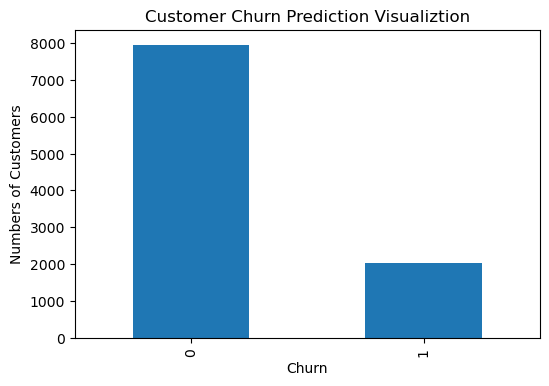

In [58]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 4))
data['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Numbers of Customers')
plt.title("Customer Churn Prediction Visualiztion")

### Using SMOTE Function 

In [59]:
X = data.drop('Exited',axis='columns')
y = data['Exited']

In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

### Test Train Split

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [62]:
# Number of classes in training Data
y_train.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [63]:
X_train.shape

(12740, 13)

### Applying different Machine Learning Algorithms to check  which algorithm is giving better accuracy

### Applying Logistic Regression Model

In [64]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')

In [67]:
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [68]:
lr.score(X_test, y_test)

0.704331450094162

### Applying Support Vector Machine Model

In [69]:
from sklearn.svm import SVC

In [71]:
svm = SVC(gamma='auto')

In [72]:
svm.fit(X_train, y_train)

SVC(gamma='auto')

In [73]:
svm.score(X_test, y_test)

0.7573760200878845

### Applying Random Forest Model

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf = RandomForestClassifier(n_estimators=40)

In [76]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [77]:
rf.score(X_test, y_test)

0.8901443816698054

In [78]:
y_pred = rf.predict(X_test)

### Confusion Matrix

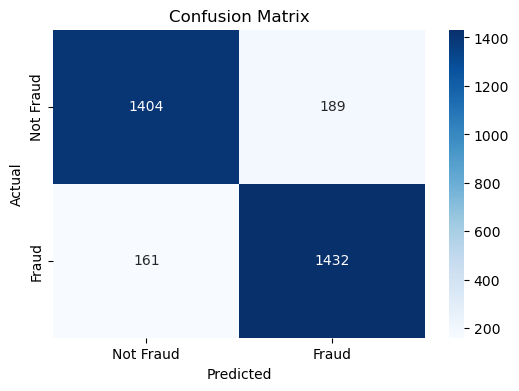

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.8901443816698054
Precision: 0.8834053053670574
Recall: 0.898932831136221
F1 Score: 0.8911014312383324
ROC AUC Score: 0.8901443816698054
